In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2 as cv
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/semimage/SEM-images-of-PCL-based-porous-materials.png
/kaggle/input/cropped-sem1/porous.png


# Image analysis on sem image


## Upload image and convert to grayscale

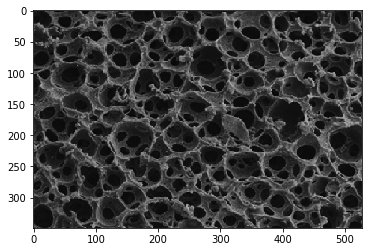

In [2]:
img = cv.imread('/kaggle/input/cropped-sem1/porous.png')
plt.imshow(img)
plt.show()

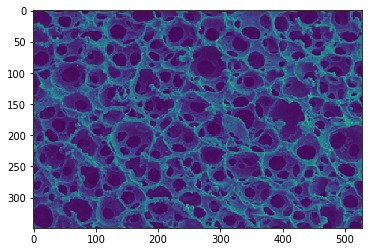

In [3]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.show()

## Image Enhancement

* Each sample should first be treated with a morphological filter (opening followed by closing operation). Square with unity dimension was used as a structuring element. 
* Next although not an image enhancement technique must be done as the next step which is RGB to grey scale conversion. 
* Next contrast enhancement needs to be performed. This can be done with help of histogram equalization. Histogram equalization that is to be performed can be local or global. Adaptive histogram equalization is a type of local histogram equalization. For this paper we have used a contrast enhancement technique known as contrast limited adaptive histogram equalization (CLAHE) which is a variant of adaptive histogram technique. Local histogram equalization is preferred because some specific parts of the image representing pores may have low illumination.

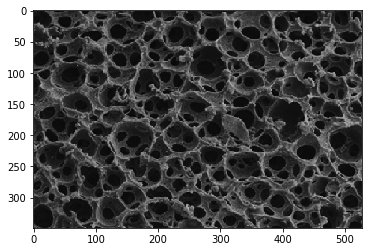

In [4]:
kernel = np.ones((1,1),np.uint8)
#opening
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) 
# closing
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

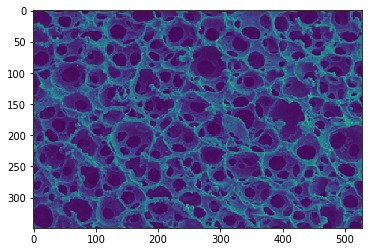

In [5]:
gray_img2 = cv.cvtColor(closing, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img2)
plt.show()

 A
morphological filter was used which consists of opening
followed by closing with a structuring element of slightly
larger dimension. This step helps in removing noise that
appears in the black and white regions after thresholding and
thereby increases the accuracy of porosity value obtained at
the end of the procedure. A median filter could also be used
to get better results.

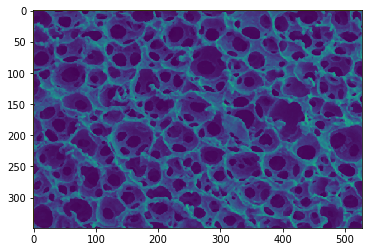

In [6]:
median_gray_img2=cv.medianBlur(gray_img2,3)
plt.imshow(median_gray_img2)
plt.show()

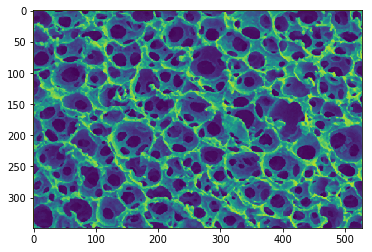

In [7]:
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(median_gray_img2)
plt.imshow(cl1)
plt.show()

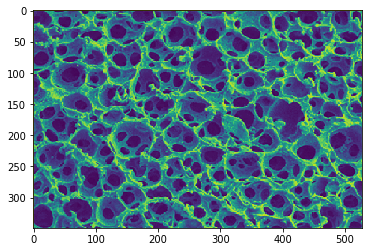

In [8]:
cl2=clahe.apply(gray_img)
plt.imshow(cl2)
plt.show()

 ## Thresholding (Binarization)

The standard Otsu’s algorithm determines appropriate threshold value by minimizing the within class variance or intra class variance which is simply the sum of the two variances multiplied by their associated weights. This is represented by Wb*σb2 + Wf*σf2 . Wb and Wf represent the weights of the background and foreground pixels. σf and σb represent the mean of the foreground and background pixels respectively.


(array([   0.,  653., 1875., 8399., 7259., 5195., 3118., 4931., 3574.,
        3738., 3742., 1930., 3150., 2279., 3527., 2112., 2981., 2230.,
        3122., 2432., 3113., 2820., 1775., 2933., 1978., 2877., 1652.,
        2645., 1785., 2536., 2732., 1769., 2411., 1662., 2468., 1663.,
        2585., 1569., 2214., 1478., 2252., 2207., 1420., 2156., 1479.,
        2179., 1386., 2105., 1373., 2193., 2132., 1409., 2053., 1485.,
        2044., 1390., 2090., 1391., 2058., 1351., 1947., 2078., 1351.,
        1973., 1375., 2009., 1223., 1917., 1194., 1852., 1733., 1079.,
        1735., 1117., 1626., 1102., 1642.,  902., 1402.,  919., 1345.,
        1220.,  710.,  957.,  460.,  532.,  361.,  337.,  128.,   90.,
          14.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         877.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

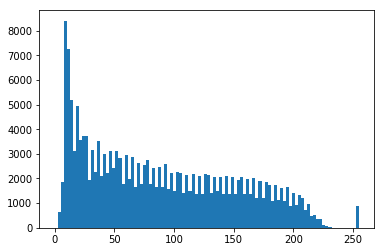

In [9]:
plt.hist(cl1.flat,bins=100,range=(0,255))

(array([0.0000e+00, 0.0000e+00, 1.8000e+01, 2.5070e+03, 9.5460e+03,
        1.5193e+04, 8.3710e+03, 8.1310e+03, 4.0100e+03, 8.0760e+03,
        5.8290e+03, 5.8650e+03, 5.4780e+03, 4.1940e+03, 5.7870e+03,
        2.8480e+03, 5.6540e+03, 4.1290e+03, 4.3000e+03, 2.8540e+03,
        5.5980e+03, 4.0900e+03, 2.8150e+03, 4.1830e+03, 2.7480e+03,
        4.0160e+03, 2.6700e+03, 3.8990e+03, 2.6100e+03, 2.7240e+03,
        3.7350e+03, 2.4510e+03, 2.5500e+03, 2.4300e+03, 2.3640e+03,
        2.2410e+03, 2.2620e+03, 2.1610e+03, 2.1070e+03, 1.9700e+03,
        1.9100e+03, 1.8990e+03, 1.8240e+03, 1.6970e+03, 8.9000e+02,
        1.5220e+03, 1.5060e+03, 1.3800e+03, 6.4100e+02, 1.2520e+03,
        1.0180e+03, 5.6500e+02, 8.8900e+02, 4.2100e+02, 7.3900e+02,
        6.7300e+02, 3.3400e+02, 4.8700e+02, 2.3100e+02, 3.3000e+02,
        1.4600e+02, 2.2000e+02, 9.9000e+01, 1.0600e+02, 5.7000e+01,
        5.4000e+01, 2.3000e+01, 3.1000e+01, 1.0000e+01, 9.0000e+00,
        1.0000e+01, 3.0000e+00, 2.0000e+00, 0.00

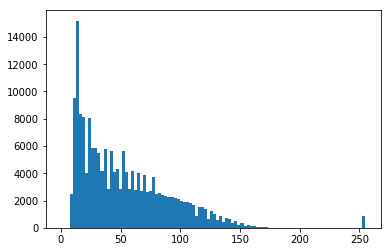

In [10]:
plt.hist(gray_img2.flat,bins=100,range=(0,255))

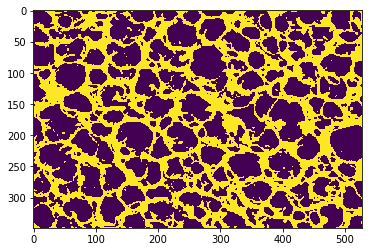

In [11]:
ret,thresh1=cv.threshold(cl1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(thresh1)
plt.show()

In [12]:
print(ret)

99.0


(array([109434.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

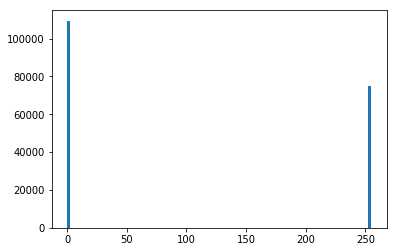

In [13]:
plt.hist(thresh1.flat,bins=100,range=(0,255))

In [14]:
size=int(np.size(thresh1))
print ("Total number of pixels in the image is =", size)
ChosenPix = cv.countNonZero(thresh1)
print("Total number of black pixels =", size-ChosenPix)
porosity_percent = (1-(ChosenPix/size))*100
print("Porosity% =",porosity_percent )

Total number of pixels in the image is = 184272
Total number of black pixels = 109434
Porosity% = 59.38721021099245


 important point for discussion that should be noted
is that image analysis using 2D images will give
satisfactorily accurate results if the rock under consideration
satisfies the property of homogeneity and isotropy. The rock
can be considered isotropic when image features are
independent of orientation. This will ensure that 2D area
fraction is roughly equivalent to 3D volume fraction for that
rock. 